<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [34]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [45]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def derivSigmoid(x):
  return x * (1 - x)

def crossEntropyLoss(y_true, y_pred, k):
  loss = y_true[y_true == 1] @ np.log(y_pred[y_true == 1])
  return -1 * loss / len(y_true.T) + network.l1 * np.abs(k[1]).mean() + network.l1 * np.abs(k[0]).mean()

def targetsSearch(data):
  predict = network.feedforward(data)[1].T
  return np.array([np.argmax(x) for x in predict])

In [46]:
class NeuralNetwork:
  def __init__(self, k):
    # weights
    self.k = k

    # bias
    self.b1 = 0
    self.b2 = 0

    # regularization parameter
    self.l1 = 0.1

    # loss
    self.loss = list()
    
  def feedforward(self, data):
    h1 = sigmoid(self.k[0] @ data)
    h2 = sigmoid(self.k[1] @ h1)      #+bias
    return (h1, h2)

  def train(self, data, y_true):
        learn_rate = 0.0005
        epochs = 3000
 
        for epoch in tqdm(range(epochs)):
            """ backprop """

            forward = self.feedforward(data)

            # Neuron h1
            h1 = forward[0]
            
            # Neuron h2
            h2 = y_pred = forward[1] 

            dL_dh2 = -1 * y_true
            dh2_dk1 = 1 - h2
            dL_dk1 = (dL_dh2 * dh2_dk1) @ h1.T

            dh2_dh1 = 1 - h2
            dh1_dk0 = h1 * (1 - h1)
            dL_dk0 = (((dL_dh2 * dh2_dh1).T @ self.k[1]).T * dh1_dk0) @ data.T

            """ Weights and bias updating """
            # Neuron h1
            self.k[0] -= learn_rate * (dL_dk0 + self.l1 * np.sign(self.k[0])) / len(data)

            # Neuron h2
            self.k[1] -= learn_rate * (dL_dk1 + self.l1 * np.sign(self.k[1])) / len(data)

            """ Loss calculation """
            self.loss.append(crossEntropyLoss(y_true, y_pred, self.k))

In [47]:
kParameters = [np.zeros((128,256)), np.zeros((10,128))]
confMatrixTest = [[0 for x in range(10)] for i in range(10)]
confMatrixValidation = [[0 for x in range(10)] for i in range(10)]

network = NeuralNetwork(kParameters)
network.train(trainInputs, trainTargets)

100%|██████████| 3000/3000 [05:31<00:00,  9.06it/s]


In [48]:
testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)
confMatrixTrain = [[0 for x in range(10)] for i in range(10)]

for index in range(len(validationPredictions)):
  confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
  confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1

for index in range(len(trainPredictions)):
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [49]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

10.0


[[0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0]]

In [50]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

10.0


[[0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 100, 0, 0, 0, 0, 0]]

In [51]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

90.0


[[0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 900, 0, 0, 0, 0, 0]]

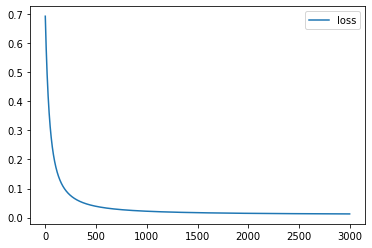

In [52]:
plt.plot(network.loss, label='loss')
plt.legend()